# Unsupervised Learning
### Workshop 4 of DASIL's series on "Introduction to Machine Learning"
### Created by Martin Pollack, Yusen He, and Declan O'Reilly

#### Dataset Introduction

Lastly we want to consider an unsupervised learning problem, where we don't actually have an outcome at all, or our data is "unlabeled." Instead of predicting something we just want to find patterns and structure in our data.

Our data can be unlabeled for two reasons:

• First, maybe our data does not have well-defined groupings. An example might be a company's customers: there are not clear and distinct groups that we can put people in. 

• Second, maybe the label of our data is missing. Suppose you are a wine vendor and you ordered three types of wine from your supplier. When you receive your wine shipment, however, you realize that the labels were not put on. You may want to learn about how the different wine bottles are related to one another to make an educated guess on which is what wine type.

Our example below falls in this second case.

In [ ]:
from sklearn import datasets
wine = datasets.load_wine(as_frame=True)

In [ ]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### Initialize the dataset

Initialize the dataset as `X`. Although we have actual labels for the wines in this dataset, splitting them into three types, we are going to ignore them for now. This is because we are trying to mimic unsupervised learning where we do not know the actual labels.

In [ ]:
X= wine.data

#### Clustering using K-Means

##### Intialize the K-Means Algorithm

The first of two algorithms we will use for clustering is k-means.

We can create this model by defining the number of clusters with `n_clusters` and a random initialization state so that we all get the same results.

In [ ]:
from sklearn.cluster import KMeans
#Here we set n=3 in this workshop
cluster_KMeans = KMeans(n_clusters=3, random_state=0)
cluster_KMeans

KMeans(n_clusters=3, random_state=0)

##### Fit and predict using K-Mean algorithm



In [ ]:
cluster_KMeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
cluster_labels = cluster_KMeans.predict(X)
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

Compute inner cluster distances (Euclidean distances) within all clusters. This gives us a sense of how good our clustering is. The smaller the number, the better. But the raw number below is hard to assess since we have nothing to compare it to.

In [ ]:
cluster_KMeans.inertia_

2370689.686782969

##### Find the BEST k

Above we immediately tried to make 3 clusters since we know that in reality, there are 3 wine types. But suppose we did not know how many there were.

Then we would try to cluster our data into multiple numbers of groups and see which is best. This is what we do below.

In [ ]:
#Store the sum of inner cluster distances in a list and name is as dist
dist=[]

for i in range(2,11):
  #Run k-mean clustering with i centers
  cluster_KMeans = KMeans(n_clusters =i, random_state=0)
  cluster_KMeans.fit(X)
  #Store the summed inner cluster distances into the list namely 'dist'
  dist.append(cluster_KMeans.inertia_)

Now dist tells us how well each number of groupings does in putting data points together.

In [ ]:
dist

[4543749.614531862,
 2370689.686782968,
 1331903.0622637183,
 916379.187153917,
 647326.0020260847,
 412137.50910045847,
 324523.6250001953,
 270954.92924153747,
 217887.378560333]

Now, let's use `matplotlib` library to visualize the inner cluster distances for the various values of k.

In [ ]:
import matplotlib.pyplot as plt

We can plot the inner cluster distance curve and use Elbow's method to seek for optimal k

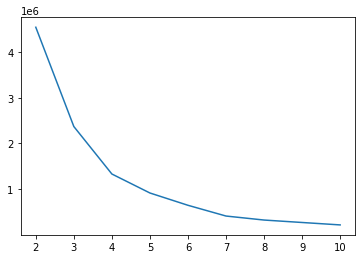

In [ ]:
import pandas as pd
import numpy as np

elbowPlot = pd.DataFrame(dist)
elbowPlot.rename(columns={0: "Inner cluster distance"}, inplace=True)
elbowPlot["Number of Clusters"] = np.arange(2, 11)

plt.plot(elbowPlot["Number of Clusters"], elbowPlot["Inner cluster distance"])
plt.show()

Using the elbow method, 3 or 4 wine types seems to be best. This is because at these values for k, the graph becomes less steep and starts to flatten.

We use TSNE, another dimension reduction algorithm besides Principal Component Analysis, to visualize our data in two dimensions.

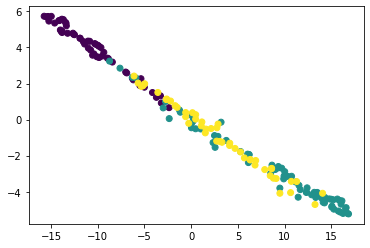

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=wine.target)

It looks like two of the wines are hard to differentiate, and the third is still not that different from the other two.

Therefore, it is hard to decide how many clusters is best. So different algorithms with their different assumptions will give us different answers.